In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('BankNoteAuthentication.csv')

In [6]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    auc_score = roc_auc_score(y_true, y_prob)
    print(f"AUC = {auc_score:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend(loc="lower right")
    plt.show()



--- Logistic Regression ---
Confusion Matrix:
[[220   9]
 [  0 183]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9607    0.9800       229
           1     0.9531    1.0000    0.9760       183

    accuracy                         0.9782       412
   macro avg     0.9766    0.9803    0.9780       412
weighted avg     0.9792    0.9782    0.9782       412

AUC = 0.9999


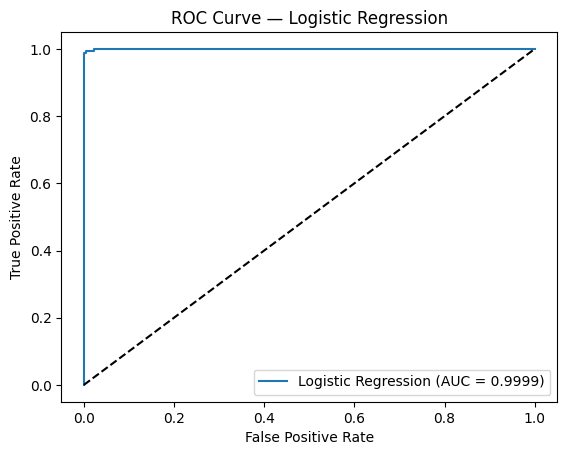

--- Decision Tree ---
Confusion Matrix:
[[225   4]
 [  1 182]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9956    0.9825    0.9890       229
           1     0.9785    0.9945    0.9864       183

    accuracy                         0.9879       412
   macro avg     0.9870    0.9885    0.9877       412
weighted avg     0.9880    0.9879    0.9879       412

AUC = 0.9885


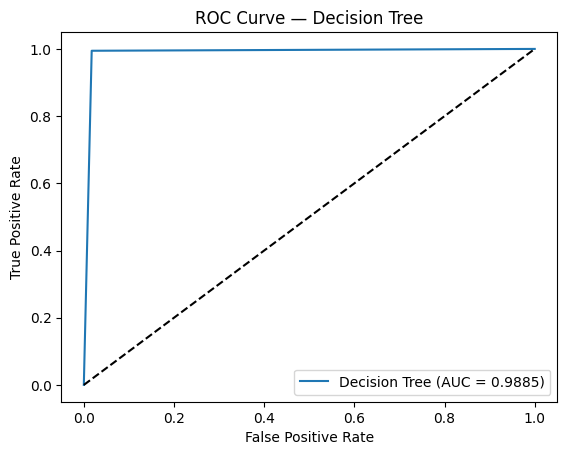

In [12]:
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)
